In [ ]:
from sympy import *
from dataclasses import dataclass
from IPython.display import display as Idisplay
from IPython.display import Math

In [ ]:
greek = ['alpha', 'beta', 'gamma', 'Gamma', 'delta', 'Delta', 'epsilon',
         'varepsilon', 'zeta', 'eta', 'theta', 'vartheta', 'Theta', 'iota',
         'kappa', 'lambda', 'Lambda', 'mu', 'nu', 'xi', 'Xi', 'pi', 'Pi',
         'rho', 'varrho', 'sigma', 'Sigma', 'tau', 'upsilon', 'Upsilon',
         'phi', 'varphi', 'Phi', 'chi', 'psi', 'Psi', 'omega', 'Omega']

n = int(input('Enter the number of dimensions:\n'))
coords = []
for i in range(n):
    coords.append(Symbol(str(input('Enter coordinate label %d:\n' % i))))

In [ ]:
@dataclass(frozen=False, order=True)
class Tensor:
    name: str
    symbol: str
    key: str
    components: list
    
    def rank(self):
        return self.key.count('*')
    
    def tensor_zeros(self, t=0):
        for i in range(self.rank()):
            t = [t,] * n
        return MutableDenseNDimArray(t)
    
    def coord_id(self, o):
        a = []
        for i in range(self.rank()):
            c = int(o/(n**(self.rank() - i - 1)))
            a.append(str(coords[c]))
            if any(letter in a[i] for letter in greek) is True:
                a[i] = '\\' + a[i] + ' '
            o -= c * (n**(self.rank() - i - 1))  
        x = self.key
        w = 0
        for i in x:
            if i == '*':
                x = x.replace('*', a[w], 1)
                w += 1
        return self.symbol + x
    
    def print_tensor(self):
        for o in range(len(self.components)):
            if self.components[o] != 0:
                Idisplay(Math(latex(Eq(Symbol(self.coord_id(o)),
                                       self.components[o]))))
        print('\n\n')


def assign(instance, thing):
    instance.components = thing.reshape(len(thing)).tolist()


def fix_input(expr):
    expr = expr.replace('^', '**')
    for i in range(len(expr)-1):
        if expr[i].isnumeric() and (expr[i+1].isalpha() or
                                    expr[i+1] == '('):
            expr = expr[:i+1] + '*' + expr[i+1:]
    return expr

In [8]:
from sympy import *
from dataclasses import dataclass
from IPython.display import display as Idisplay
from IPython.display import Math

greek = ['alpha', 'beta', 'gamma', 'Gamma', 'delta', 'Delta', 'epsilon',
         'varepsilon', 'zeta', 'eta', 'theta', 'vartheta', 'Theta', 'iota',
         'kappa', 'lambda', 'Lambda', 'mu', 'nu', 'xi', 'Xi', 'pi', 'Pi',
         'rho', 'varrho', 'sigma', 'Sigma', 'tau', 'upsilon', 'Upsilon',
         'phi', 'varphi', 'Phi', 'chi', 'psi', 'Psi', 'omega', 'Omega']

n = int(input('Enter the number of dimensions:\n'))
coords = []
for i in range(n):
    coords.append(Symbol(str(input('Enter coordinate label %d:\n' % i))))


@dataclass(frozen=False, order=True)
class Tensor:
    name: str
    symbol: str
    key: str
    components: list
    
    def rank(self):
        return self.key.count('*')
    
    def tensor_zeros(self, t=0):
        for i in range(self.rank()):
            t = [t,] * n
        return MutableDenseNDimArray(t)
    
    def coord_id(self, o):
        a = []
        for i in range(self.rank()):
            c = int(o/(n**(self.rank() - i - 1)))
            a.append(str(coords[c]))
            if any(letter in a[i] for letter in greek) is True:
                a[i] = '\\' + a[i] + ' '
            o -= c * (n**(self.rank() - i - 1))  
        x = self.key
        w = 0
        for i in x:
            if i == '*':
                x = x.replace('*', a[w], 1)
                w += 1
        return self.symbol + x
    
    def print_tensor(self):
        for o in range(len(self.components)):
            if self.components[o] != 0:
                Idisplay(Math(latex(Eq(Symbol(self.coord_id(o)),
                                       self.components[o]))))
        print('\n\n')


def assign(instance, thing):
    instance.components = thing.reshape(len(thing)).tolist()


def fix_input(expr):
    expr = expr.replace('^', '**')
    for i in range(len(expr)-1):
        if expr[i].isnumeric() and (expr[i+1].isalpha() or
                                    expr[i+1] == '('):
            expr = expr[:i+1] + '*' + expr[i+1:]
    return expr


metric = Tensor('metric tensor', 'g', '_**', [])
metric_inv = Tensor('inverse of metric tensor', 'g', '__**', [])
metric_d = Tensor('partial derivative of metric tensor', 'g', '_**,*', [])
Christoffel = Tensor('Christoffel symbol - 2nd kind', 'Gamma', '__*_**', [])
Christoffel_d = Tensor('partial derivative of Christoffel symbol',
                       'Gamma', '__*_**,*', [])
Riemann = Tensor('Riemann curvature tensor', 'R', '__*_***', [])
Ricci = Tensor('Ricci curvature tensor', 'R', '_**', [])
Einstein = Tensor('Einstein tensor', 'G', '_**', [])
Einstein_alt = Tensor('Einstein tensor', 'G', '__*_*', [])

# user inputs metric:
g = eye(n)
while True:
    diag = str(input('Is metric diagonal? y for yes, n for no\n')).lower()
    if diag == 'y':
        for i in range(n):
            g[i, i] = sympify(fix_input(str(input(
                'What is g_[%s%s]?\n' % (str(coords[i]), str(coords[i])
                )))))
    else:
        for i in range(n):
            for j in range(i, n):
                g[i, j] = sympify(fix_input(str(input(
                    'What is g_[%s%s]?\n' % (str(coords[i]), str(coords[j])
                    )))))
                g[j, i] = g[i, j]
    if g.det() == 0:
        print('\nMetric is singular, try again!\n')
        continue
    else:
        break

# calculate everything:
# inverse metric:
g_inv = MutableDenseNDimArray(g.inv())
assign(metric_inv, g_inv)
g = MutableDenseNDimArray(g)
assign(metric, g)
# first derivatives of metric components:
g_d = metric_d.tensor_zeros()
for i in range(n):
    for j in range(i):
        for d in range(n):
            g_d[i, j, d] = g_d[j, i, d]
    for j in range(i, n):
        for d in range(n):
            g_d[i, j, d] = diff(g[i, j], coords[d])
assign(metric_d, g_d)
# Christoffel symbols for Levi-Civita connection (Gam^i_jk):
Gamma = Christoffel.tensor_zeros()
for i in range(n):
    for j in range(n):
        for k in range(j):
            Gamma[i, j, k] = Gamma[i, k, j]
        for k in range(j, n):
            for l in range(n):
                Gamma[i, j, k] += S(1)/2 * g_inv[i, l] * (
                    -g_d[j, k, l] + g_d[k, l, j] + g_d[l, j, k]
                    )
assign(Christoffel, Gamma)
# first derivatives of Christoffel symbols (Gam^i_jk,d):
Gamma_d = Christoffel_d.tensor_zeros()
for i in range(n):
    for j in range(n):
        for k in range(j):
            for d in range(n):
                Gamma_d[i, j, k, d] = Gamma_d[i, k, j, d]
        for k in range(j, n):
            for d in range(n):
                Gamma_d[i, j, k, d] = simplify(diff(Gamma[i, j, k],
                                                    coords[d]))
assign(Christoffel_d, Gamma_d)
# Riemann curvature tensor (R^i_jkl):
Rie = Riemann.tensor_zeros()
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(k):
                Rie[i, j, k, l] = -Rie[i, j, l, k]
            for l in range(k, n):
                Rie[i, j, k, l] = Gamma_d[i, j, l, k] - Gamma_d[i, j, k, l]
                for h in range(n):
                    Rie[i, j, k, l] += (Gamma[h, j, l] * Gamma[i, h, k]
                                    - Gamma[h, j, k] * Gamma[i, h, l])
                    Rie[i, j, k, l] = simplify(Rie[i, j, k, l])
assign(Riemann, Rie)
# Ricci curvature tensor (R_jl):
Ric = simplify(tensorcontraction(Rie, (0, 2)))
assign(Ricci, Ric)
# Ricci curvature scalar:
R = 0
for i in range(n):
    for j in range(n):
        R += g_inv[i, j] * Ric[i, j]
R = simplify(R)
# Einstein tensor (G_ij):
G = Einstein.tensor_zeros()
for i in range(n):
    for j in range(i):
        G[i, j] = G[j, i]
    for j in range(i, n):
        G[i, j] = simplify(Ric[i, j] - S(1)/2 * R * g[i, j])
assign(Einstein, G)
# G^i_j:
G_alt = Einstein_alt.tensor_zeros()
for i in range(n):
    for j in range(n):
        for k in range(n):
            G_alt[i, j] += g_inv[i, k] * G[k, j]
        G_alt[i, j] = simplify(G_alt[i, j])
assign(Einstein_alt, G_alt)

# print it all
print()
metric.print_tensor()
metric_inv.print_tensor()
metric_d.print_tensor()
Christoffel.print_tensor()
Christoffel_d.print_tensor()
Riemann.print_tensor()
Ricci.print_tensor()
if R != 0:
    Idisplay(Math(latex(Eq(Symbol('R'), R))))
    print('\n\n')
Einstein.print_tensor()
Einstein_alt.print_tensor()

Enter the number of dimensions:
4
Enter coordinate label 0:
t
Enter coordinate label 1:
x
Enter coordinate label 2:
y
Enter coordinate label 3:
z
Is metric diagonal? y for yes, n for no
n
What is g_[tt]?
-1 + b**2
What is g_[tx]?
-b
What is g_[ty]?
0
What is g_[tz]?
0
What is g_[xx]?
1
What is g_[xy]?
0
What is g_[xz]?
0
What is g_[yy]?
1
What is g_[yz]?
0
What is g_[zz]?
1



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
# EasyVisualVP . py  : VPthon ,  simple graph  object
from vpython import * # Import Vpython
#
graph1 = graph(align = 'left', width = 400,  height = 400,
               background = color.white , foreground = color.black )
#
Plot1=gcurve (color = color.red)
#
for x in arange (0 , 8.1 , 0.1 ):
    Plot1.plot(pos = (x, 5*cos(2*x)*exp(-0.4*x)))
graph2 = graph(align = 'right', width = 400, height = 400, background = color.white, 
              foreground = color.black, title = '2-D  Plot', xtitle = 'x', ytitle = 'f(x)')
#
Plot2 = gdots(color = color.black) 
#
for x in arange(-5,5 ,0.1):
    Plot2.plot(pos = (x , cos(x)))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

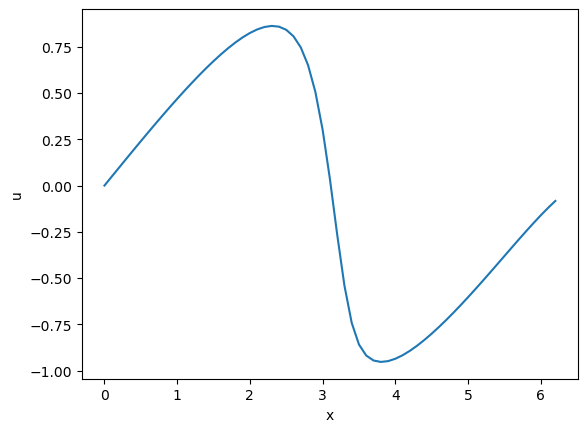

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain and time step
x_min = 0
x_max = 2 * np.pi
t_max = 1
dx = 0.1
dt = 0.01

# Define the initial condition
x = np.arange(x_min, x_max, dx)
u = np.sin(x)

# Define the viscosity
nu = 0.1

# Calculate the number of time steps
nt = int(t_max / dt)

# Implement the finite difference method
for n in range(nt):
    un = u.copy()
    for i in range(1, len(x) - 1):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) + nu * dt / dx**2 * (un[i+1] - 2*un[i] + un[i-1])

# Plot the solution
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u')
plt.show()
